<a href="https://colab.research.google.com/github/maheshyadav007/research/blob/main/NPK_NPV_Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import keras.backend as K
from sklearn.metrics import roc_auc_score
from scipy.linalg import qr



In [ ]:
#X, Y = shuffle(X,Y)
def split_data(X,Y):
  x_train = []
  y_train = []

  x_train, x_val, y_train, y_val = train_test_split(X, Y, train_size=0.9)

  x_train = np.array(x_train)
  y_train = np.array(y_train)
  x_val = np.array(x_val)
  y_val = np.array(y_val)
  
  return x_train, y_train, x_val, y_val

11501568/11490434 [==============================] - 1s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


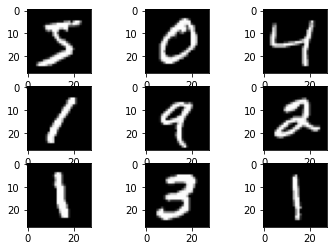

In [ ]:

from keras.datasets import mnist
from matplotlib import pyplot
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [ ]:
x_train, y_train, x_val, y_val = split_data(trainX,trainy)

In [ ]:
epoch = 10
model = Sequential()
model.add(keras.layers.InputLayer(input_shape=(28,28)))
model.add(keras.layers.experimental.preprocessing.Rescaling(scale=1.0 / 255))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation="relu", use_bias= False))
model.add(keras.layers.Dense(128, activation="relu", use_bias= False))
model.add(keras.layers.Dense(128, activation="relu", use_bias= False))
model.add(keras.layers.Dense(128, activation="relu", use_bias= False))
model.add(keras.layers.Dense(128, activation="relu", use_bias= False))
model.add(keras.layers.Dense(10, activation="softmax", use_bias= False))
model.compile(optimizer=keras.optimizers.SGD(learning_rate=.1),loss=keras.losses.sparse_categorical_crossentropy, metrics = ["accuracy"])
model.fit(x_train, y_train,batch_size=32, epochs=epoch, validation_data=(x_val,y_val))#,callbacks=[CustomCallback()])


Epoch 1/10
1688/1688 [==============================] - 7s 3ms/step - loss: 0.3367 - accuracy: 0.8960 - val_loss: 0.1695 - val_accuracy: 0.9505
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1265 - accuracy: 0.9622 - val_loss: 0.1449 - val_accuracy: 0.9560
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0910 - accuracy: 0.9726 - val_loss: 0.1223 - val_accuracy: 0.9618
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0705 - accuracy: 0.9778 - val_loss: 0.1696 - val_accuracy: 0.9527
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0566 - accuracy: 0.9824 - val_loss: 0.0994 - val_accuracy: 0.9730
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0461 - accuracy: 0.9856 - val_loss: 0.1602 - val_accuracy: 0.9577
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0387 - accuracy: 0.9879 - val_loss: 0.0927 - val_accuracy:

In [ ]:
npk_extractor = keras.Model(inputs=model.inputs,outputs=[layer.output for layer in model.layers])

In [ ]:
npk_features = npk_extractor(x_train)
npk_features = npk_features[2:-1]

In [ ]:
npk_features

[<tf.Tensor: shape=(54000, 128), dtype=float32, numpy=
 array([[0.0000000e+00, 0.0000000e+00, 2.8022462e-01, ..., 0.0000000e+00,
         0.0000000e+00, 5.9240955e-01],
        [0.0000000e+00, 0.0000000e+00, 2.5003896e+00, ..., 3.2521172e+00,
         0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 3.0209930e+00, 0.0000000e+00, ..., 2.4982542e-03,
         0.0000000e+00, 0.0000000e+00],
        ...,
        [2.8580117e-01, 0.0000000e+00, 2.9952648e+00, ..., 2.8832569e+00,
         0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.6258442e+00,
         0.0000000e+00, 9.4742596e-01],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00]], dtype=float32)>,
 <tf.Tensor: shape=(54000, 128), dtype=float32, numpy=
 array([[0.        , 0.        , 0.        , ..., 1.6029418 , 2.0050745 ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
     

In [ ]:
keras.utils.plot_model(, show_shapes = True, expand_nested=True)

In [ ]:
x_dummy_train = np.ones(shape = (x_train.shape[0], 28,28))
x_dummy_val = np.ones(shape = (x_val.shape[0], 28, 28))


In [ ]:

class GaLU(keras.layers.Layer):
    def __init__(self, units=128, layer_n = 0, batch_size= 32):
        super(GaLU, self).__init__()
        self.units = units
        self.start = -54
        self.batch_size = batch_size
        self.end = self.start + self.batch_size
        self.layer_n = layer_n

    def build(self, input_shape):
      pass
      
    def call(self, inputs):
      print( self.start,self.end, inputs.shape)
      out = tf.math.multiply(inputs,tf.math.sign(npk_features[self.layer_n][self.start:self.end]))
     
      self.start = self.end
      if self.start==54000:
        self.start = 0
      self.end = self.start + self.batch_size
      if self.end >= 54000:
        self.end = 54000
      
     
      return out

In [ ]:
start = 0
batch_size = 32
end = start + batch_size
counter = 0
def custom_activation(i,x):
  global start
  global end
  global batch_size
  global counter
  print(i, start,end, x.shape)
  
  out = tf.math.multiply(x,tf.math.sign(npk_features[i][start:end]))
    
  if counter >= 5:
    start = end % 54000
    end = start + batch_size
    if end > 54000:
      end = 54000

  counter += 1
  #i += 1
  return out
  

In [ ]:
def custom_relu(x):
  return x

In [ ]:

epoch = 10
#model.add(keras.layers.InputLayer(input_shape=(784,)))

inputs = keras.layers.Input(shape=(28,28))
x = keras.layers.experimental.preprocessing.Rescaling(scale=1.0 / 255)(inputs)
x = keras.layers.Flatten()(x)

x = keras.layers.Dense(128, use_bias= False)(x)
x = custom_activation(0,x)
x = keras.layers.Lambda(custom_relu)(x)
x = keras.layers.Dense(128, use_bias= False)(x)
x = custom_activation(1,x)
x = keras.layers.Lambda(custom_relu)(x)
x = keras.layers.Dense(128, use_bias= False)(x)
x = custom_activation(2,x)
x = keras.layers.Lambda(custom_relu)(x)
x = keras.layers.Dense(128, use_bias= False)(x)
x = custom_activation(3,x)
x = keras.layers.Lambda(custom_relu)(x)
x = keras.layers.Dense(128, use_bias= False)(x)
x = custom_activation(4,x)
x = keras.layers.Lambda(custom_relu)(x)

outputs = keras.layers.Dense(10, activation = "softmax", use_bias = False)(x)

model = keras.Model(inputs=inputs, outputs=outputs)


'''
model.add(keras.layers.Dense(128, use_bias= False))
model.add(GaLU(128, 0, batch_size))
model.add(keras.layers.Dense(128, use_bias= False))
model.add(GaLU(128, 1, batch_size))
model.add(keras.layers.Dense(128, use_bias= False))
model.add(GaLU(128, 2, batch_size))f
model.add(keras.layers.Dense(128, use_bias= False))
model.add(GaLU(128, 3, batch_size))
model.add(keras.layers.Dense(128, use_bias= False))
model.add(GaLU(128, 4, batch_size))
'''
'''

model.add(keras.layers.Dense(128, use_bias= False))
model.add(keras.layers.Activation(custom_activation))
model.add(keras.layers.Dense(128, use_bias= False))
model.add(keras.layers.Activation(custom_activation))
model.add(keras.layers.Dense(128, use_bias= False))
model.add(keras.layers.Activation(custom_activation))
model.add(keras.layers.Dense(128, use_bias= False))
model.add(keras.layers.Activation(custom_activation))
model.add(keras.layers.Dense(128, use_bias= False))
model.add(keras.layers.Activation(custom_activation))
'''

model.compile(optimizer=keras.optimizers.SGD(learning_rate=.01),loss=keras.losses.sparse_categorical_crossentropy, metrics = ["accuracy"])
model.fit(x_train, y_train,batch_size=batch_size, epochs=epoch)#,callbacks=[CustomCallback()])


In [ ]:
npv_extractor = keras.Model(inputs=model.inputs,outputs=[layer.output for layer in model.layers])
npv_features = npv_extractor(x_train[:54])

0 162 216 (54, 128)
1 162 216 (54, 128)
2 162 216 (54, 128)
3 162 216 (54, 128)
4 162 216 (54, 128)


In [ ]:
npv_features  = npv_features[2:-1]

In [ ]:
keras.utils.plot_model(npv_extractor, show_shapes = True, expand_nested=True)

In [ ]:
npv_features 

In [ ]:
import torch
from torch import nn
from torch.utils.data import Dataset

from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
import torch.nn.functional as F


In [ ]:
# Download training data from open datasets.
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


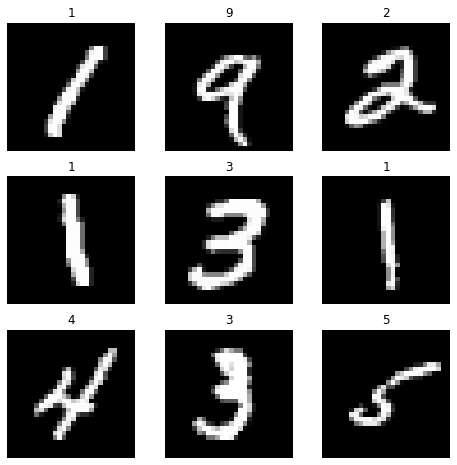

In [ ]:
labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
counter = 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[counter]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
    counter += 1
plt.show()


In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    correct = 0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        #print(X.shape,y.shape)
        # Compute prediction error
        pred, _ = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch%100 == 0:
            #correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f} Batch:{batch} [{current:>5d}/{size:>5d}]")

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred,_ = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
def get_activation_output(dataloader, model):
    gate = []
    count = 0
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            _,gate  = model(X)
            
            '''
            if count >= 1:
              gate = np.vstack((gate,g))
              
            else:
              gate = np.reshape(g, shape= (1,5))
              count += 1
           '''
    return gate

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

class NPKNeuralNetwork(nn.Module):
    def __init__(self):
        super(NPKNeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 128)
        self.fc4 = nn.Linear(128, 128)
        self.fc5 = nn.Linear(128, 128)
        self.fc6 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        o1 = torch.relu(x)
        x = self.fc2(o1)
        o2 = torch.relu(x)
        x = self.fc3(o2)
        o3 = torch.relu(x)
        x = self.fc4(o3)
        o4 = torch.relu(x)
        x = self.fc5(o4)
        o5 = torch.relu(x)
        x = self.fc6(o5)
        x = torch.sigmoid(x)
        return x, [o1,o2,o3,o4,o5]



Using cuda device


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 128)
        self.fc4 = nn.Linear(128, 128)
        self.fc5 = nn.Linear(128, 128)
        self.fc6 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        o1 = custom_relu(0,x, )
        x = self.fc2(o1)
        o2 = custom_relu(1,x)
        x = self.fc3(o2)
        o3 = custom_relu(2,x)
        x = self.fc4(o3)
        o4 = custom_relu(3,x)
        x = self.fc5(o4)
        o5 = custom_relu(4,x)
        x = self.fc6(o5)
        x = torch.sigmoid(x)
        return x,  [o1,o2,o3,o4,o5]



Using cuda device


In [ ]:
batch_size = 32
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)
train_dataloader_all = DataLoader(training_data, batch_size=60000, shuffle=False)


In [ ]:
npk_model = NPKNeuralNetwork().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(npk_model.parameters(), lr=1e-1)
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, npk_model, loss_fn, optimizer)
    test(test_dataloader, npk_model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.303520 Batch:0 [    0/60000]
loss: 2.300847 Batch:100 [ 3200/60000]
loss: 2.301060 Batch:200 [ 6400/60000]
loss: 2.300098 Batch:300 [ 9600/60000]
loss: 2.302687 Batch:400 [12800/60000]
loss: 2.304715 Batch:500 [16000/60000]
loss: 2.302285 Batch:600 [19200/60000]
loss: 2.297561 Batch:700 [22400/60000]
loss: 2.300750 Batch:800 [25600/60000]
loss: 2.280433 Batch:900 [28800/60000]
loss: 2.298139 Batch:1000 [32000/60000]
loss: 2.290489 Batch:1100 [35200/60000]
loss: 2.192960 Batch:1200 [38400/60000]
loss: 2.062230 Batch:1300 [41600/60000]
loss: 1.931111 Batch:1400 [44800/60000]
loss: 1.917096 Batch:1500 [48000/60000]
loss: 1.890377 Batch:1600 [51200/60000]
loss: 1.852658 Batch:1700 [54400/60000]
loss: 1.832281 Batch:1800 [57600/60000]
Test Error: 
 Accuracy: 25.3%, Avg loss: 1.812321 

Epoch 2
-------------------------------
loss: 1.858753 Batch:0 [    0/60000]
loss: 1.857159 Batch:100 [ 3200/60000]
loss: 1.706246 Batch:200 [ 6400/60000]
loss:

In [ ]:
npk_features = get_activation_output(train_dataloader_all, npk_model)

In [ ]:
npk_features[0] = npk_features[0].detach()
npk_features[1] = npk_features[1].detach()
npk_features[2] = npk_features[2].detach()
npk_features[3] = npk_features[3].detach()
npk_features[4] = npk_features[4].detach()


In [ ]:
start = 0
count = 0
def custom_relu(i,x):
  global start
  global batch_size
  global count
  
  #npk_features_tensor = t(npk_features[i][start:end].detach()))
  #npk_features_tensor = npk_features_tensor.to(device)
  end = start + x.shape[0]
  #print(count, start,end, x.shape,npk_features[i][start:end].shape)

  out = torch.mul(x,torch.sign(npk_features[i][start:end]))
  
  if i == 4:
    count += 1
    start = end 
    if x.shape[0] < batch_size:
      print(count,start, end,  x.shape[0])
      start = 0
      count = 0
    if start == 60000:
      print(count,start, end,  x.shape[0])
      start = 0
      count = 0
  
  return out
  

In [ ]:
class CustomImageDataset(Dataset):
    def __init__(self, size = 60000):
        self.size = size
        self.x = torch.ones(60000,784)
        self.y = torch.tensor([x for _,x in training_data])

    def __len__(self):
        return (self.size)

    def __getitem__(self, idx):
        #print(self.x[idx].shape,self.y[idx].shape )
        return self.x[idx], self.y[idx]

In [ ]:
x_dummy_dataloader_all = DataLoader(CustomImageDataset(), batch_size=60000, shuffle=False)

In [ ]:
x_dummy_dataloader = DataLoader(CustomImageDataset(), batch_size=batch_size, shuffle=False)

In [ ]:
npv_model = NeuralNetwork().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(npv_model.parameters(), lr=1e-1)
epochs = 10

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(x_dummy_dataloader, npv_model, loss_fn, optimizer)
    test(x_dummy_dataloader, npv_model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.300483 Batch:0 [    0/60000]
loss: 2.281097 Batch:100 [ 3200/60000]
loss: 1.726893 Batch:200 [ 6400/60000]
loss: 1.518400 Batch:300 [ 9600/60000]
loss: 1.477747 Batch:400 [12800/60000]
loss: 1.518617 Batch:500 [16000/60000]
loss: 1.477794 Batch:600 [19200/60000]
loss: 1.464655 Batch:700 [22400/60000]
loss: 1.478743 Batch:800 [25600/60000]
loss: 1.461625 Batch:900 [28800/60000]
loss: 1.483799 Batch:1000 [32000/60000]
loss: 1.495897 Batch:1100 [35200/60000]
loss: 1.496146 Batch:1200 [38400/60000]
loss: 1.513319 Batch:1300 [41600/60000]
loss: 1.494576 Batch:1400 [44800/60000]
loss: 1.467272 Batch:1500 [48000/60000]
loss: 1.465674 Batch:1600 [51200/60000]
loss: 1.470124 Batch:1700 [54400/60000]
loss: 1.526213 Batch:1800 [57600/60000]
1875 60000 60000 32
1875 60000 60000 32
Test Error: 
 Accuracy: 97.0%, Avg loss: 1.487714 

Epoch 2
-------------------------------
loss: 1.492480 Batch:0 [    0/60000]
loss: 1.470164 Batch:100 [ 3200/60000]
loss

In [ ]:
test(x_dummy_dataloader, npv_model, loss_fn)

1875 60000 60000 32
Test Error: 
 Accuracy: 97.4%, Avg loss: 1.482656 



In [ ]:
npv_features = get_activation_output(train_dataloader_all, npv_model)

1 60000 60000 60000


In [ ]:
npk_features

[tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.1445, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.9706, 1.1460, 0.0000,  ..., 0.0000, 0.0000, 0.3695],
         ...,
         [0.0000, 0.0000, 0.0478,  ..., 0.0000, 0.0000, 0.5184],
         [0.0733, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.2388,  ..., 0.0000, 0.6036, 0.7320]],
        device='cuda:0'),
 tensor([[1.3773, 1.5552, 0.3290,  ..., 0.9093, 0.6695, 1.4113],
         [2.3106, 2.3575, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0765,  ..., 0.0000, 0.0000, 0.0841],
         ...,
         [1.3608, 1.7373, 0.0000,  ..., 1.1201, 0.8647, 1.7885],
         [0.8850, 0.8192, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.3168, 0.0000, 0.0000,  ..., 0.0664, 0.3493, 0.5734]],
        device='cuda:0'),
 tensor([[0.0000e+00, 7.5501e-01, 8.6100e-01,  ..., 0.0000e+00, 2.3590e+00,
          1.1204e+00],
         [0.0000e+00, 2.5445e+00, 3.358

In [ ]:
npv_features

[tensor([[ 0.0000, -0.0000, -0.0000,  ...,  0.0000,  0.1235, -0.0000],
         [ 0.0000, -0.0000,  0.0000,  ..., -0.0000,  0.0000, -0.0000],
         [ 0.3345, -0.9954, -0.0000,  ..., -0.0000,  0.0000, -0.2897],
         ...,
         [ 0.0000, -0.0000, -0.1436,  ...,  0.0000,  0.0000, -0.1096],
         [ 0.4943, -0.0000, -0.0000,  ...,  0.0000,  0.0000, -0.0000],
         [ 0.0000, -0.0000, -0.1588,  ...,  0.0000,  0.2184, -0.1047]],
        device='cuda:0'),
 tensor([[ 0.4391,  0.3837, -0.0869,  ..., -0.2399, -0.3492,  0.0164],
         [ 0.9204,  0.3013, -0.0000,  ...,  0.0000, -0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.4214,  ...,  0.0000,  0.0000, -0.2148],
         ...,
         [ 0.8514,  0.4592,  0.0000,  ...,  0.1396, -0.5176,  0.0384],
         [ 0.2497,  0.2367,  0.0000,  ...,  0.0000, -0.0000, -0.0000],
         [ 0.6724,  0.0000,  0.0000,  ...,  0.3744, -0.2209,  0.0961]],
        device='cuda:0'),
 tensor([[-0.0000, -1.1215,  0.2886,  ...,  0.0000, -0.7472,  0.28

In [ ]:
!pip install torchviz

  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4151 sha256=89ab6c631e77f18a46b62c619dbf8f69d75d89be47d9869d6fb4eafe6fd2dabf
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


1 1 1 1


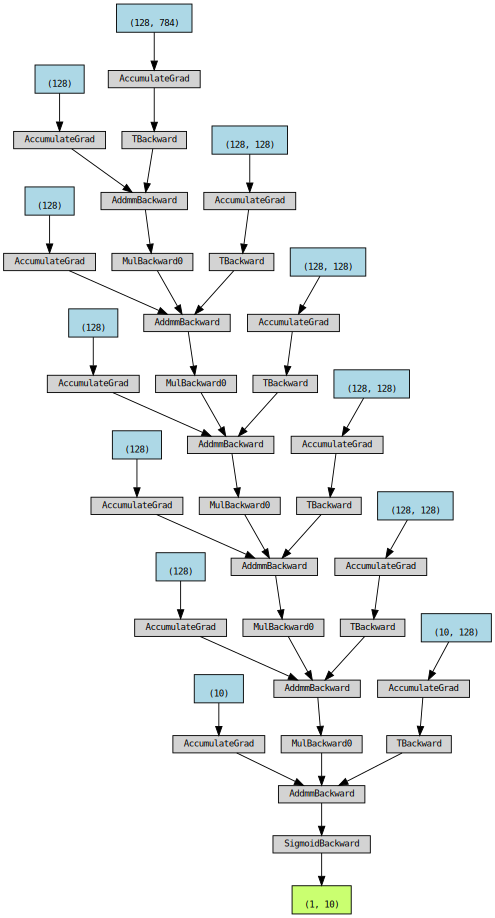

In [ ]:
from torchviz import make_dot
x, y = training_data[0]
pred, _ = npv_model(x.to(device))
make_dot(pred)

In [ ]:
x.shape

torch.Size([1, 28, 28])